[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/111_df_sd/111_df_sd.ipynb)

# Stable Diffusion

En este post veremos varias cosas que podemos hacer con stable diffusion usando Hugging Face.

## Generación de imágenes a partir de texto

```
pip install diffusers==0.4.0 transformers scipy ftfy
```

In [1]:
import os 
from dotenv import load_dotenv
from diffusers import StableDiffusionPipeline

load_dotenv()

token = os.environ['HFTOKEN']
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=token)
pipe.to('cuda');

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [2]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/51 [00:00<?, ?it/s]

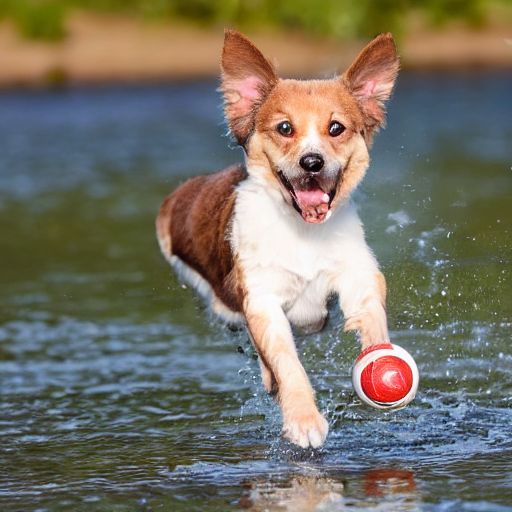

In [3]:
# prompt = "a photograph of an astronaut riding a horse"
prompt = "a photograph of a white and brown American Staffordshire Terrier playing with a ball in the river"

image = pipe(prompt)["sample"]
image_grid(image, rows=1, cols=1)

- guidance_scale is a way to increase the adherence to the conditional signal that guides the generation (text, in this case) as well as overall sample quality. It is also known as classifier-free guidance, which in simple terms forces the generation to better match the prompt potentially at the cost of image quality or diversity. Values between 7 and 8.5 are usually good choices for Stable Diffusion.
- In general, results are better the more steps you use, however the more steps, the longer the generation takes. Stable Diffusion works quite well with a relatively small number of steps, so we recommend to use the default number of inference steps of 50. If you want faster results you can use a smaller number. If you want potentially higher quality results, you can use larger numbers.

In [4]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)
num_images = 6
prompts = [prompt] * num_images

images = pipe(prompts, guidance_scale=7.5, num_inference_steps=100, generator=generator).images
image_grid(images, rows=2, cols=3)


  0%|          | 0/101 [00:00<?, ?it/s]